###                                 CSE1016 - Deep Learning
###                                          Lab 5
####     Implementing CNN from scratch and comparing it with MLP for MNIST dataset

AJAY RAJKUMAR K

20BAI1020

CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

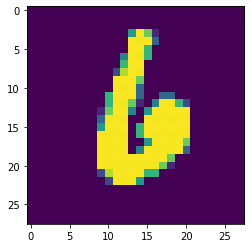

In [ ]:
plt.imshow(X_train[1092].reshape(28,28))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# model training
history = model.fit(
    X_train, y_train, epochs=3,
    validation_data = (X_test, y_test),
    verbose=1
)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1153 - accuracy: 0.9655 - val_loss: 0.0461 - val_accuracy: 0.9848
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0328 - val_accuracy: 0.9898


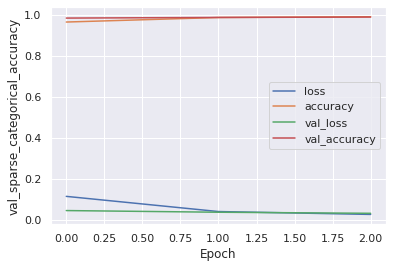

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch')
plt.ylabel('val_sparse_categorical_accuracy')
plt.legend()


CNN with smaller kernel

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# model training
history = model.fit(
    X_train, y_train, epochs=3,
    validation_data = (X_test, y_test),
    verbose=1
)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1357 - accuracy: 0.9591 - val_loss: 0.0584 - val_accuracy: 0.9821
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0427 - val_accuracy: 0.9861


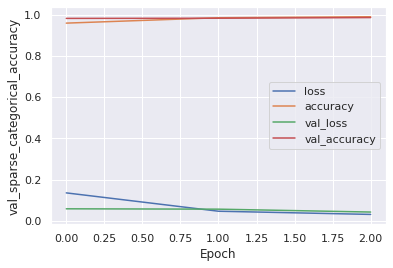

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch')
plt.ylabel('val_sparse_categorical_accuracy')
plt.legend()


# **Comparing CNN with MLP**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from IPython.display import Image, clear_output
sns.set()

data = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

clear_output()
print("X_train_full shape :",X_train_full.shape)
print("X_test shape :", X_test.shape)


X_train_full shape : (60000, 28, 28)
X_test shape : (10000, 28, 28)


In [ ]:
X_v, X_train = X_train_full[:5000], X_train_full[5000:]
y_v, y_train = y_train_full[:5000], y_train_full[5000:]
X_v, X_train = X_v/255., X_train/255.

In [ ]:
#two deep layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# model training with 3 epochs (to closely simulate CNN which had 3 epochs as well)
history = model.fit(
    X_train, y_train, epochs=3,
    validation_data = (X_v, y_v),
    verbose=1
)

Epoch 1/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9205 - val_loss: 0.1255 - val_accuracy: 0.9634
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1148 - accuracy: 0.9654 - val_loss: 0.0970 - val_accuracy: 0.9706
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.1076 - val_accuracy: 0.9668


In [ ]:
# model training
history = model.fit(
    X_train, y_train, epochs=10,
    validation_data = (X_v, y_v),
    verbose=1
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.9167 - val_loss: 0.1265 - val_accuracy: 0.9630
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1142 - accuracy: 0.9653 - val_loss: 0.1059 - val_accuracy: 0.9686
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9745 - val_loss: 0.0857 - val_accuracy: 0.9756
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0948 - val_accuracy: 0.9714
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9837 - val_loss: 0.0867 - val_accuracy: 0.9744
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0394 - accuracy: 0.9869 - val_loss: 0.0934 - val_accuracy: 0.9772
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.0792 - val_accuracy:

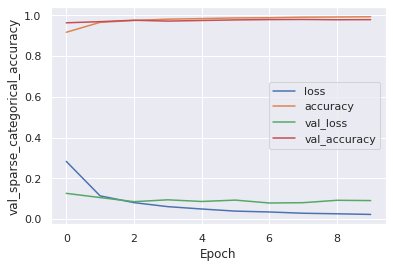

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch')
plt.ylabel('val_sparse_categorical_accuracy')
plt.legend()



**Conclusions:**

1. CNN with 2 convolutional layers, a flattening layer and a dense layer(last dense layer being the final layer) provided an accuracy of about 99.13%

1. Comparing to a CNN model, MLP model with 3 dense layers and a flattening layer provided an accuracy of about 97.48% (3 epochs), 99.27% (10 epochs, but overfitted)

3. As the kernel size was decreased, there was a noticable increase in execution time(due to increase in area to be covered) and the testing accuracy also decreased due to overfitting, as more unique features are analysed.

4. While the CNN required only 3 epochs(stopped with 3, as higher epochs had increasing valuation loss, a usual feature of overfitting), MLP model required about 10 epochs to achieve similar accuracy, this tells about the usage of computational power and how CNN would be more efficient than MLP.
